Load and plot distribution


In [1]:
# imports
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from utils.trial_data import TrialData
from utils.util_plot import (
    eval_trial_data,
    plot_time_frechet,
    plot_distance_angle,
    plot_rms, plot_avg_cost,
    scatter_time_frechet, scatter_distance_angle, scatter_rms)

In [2]:
# define path of trials
WORK_DIR = '/home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results'
waffle_std_path = WORK_DIR + '/default_distribution_2024-11-24_13-23-28'
burger_std_path = WORK_DIR + '/burger_distribution_2024-11-24_14-35-54'
enjoy_std_path = WORK_DIR + '/enjoy_distribution_2024-11-24_14-35-12'
enjoy2_std_path = WORK_DIR + '/enjoy_distribution_w_enjoy_params_2024-12-27_21-09-52'

# load data
waffle_std_data = eval_trial_data(waffle_std_path)
burger_std_data = eval_trial_data(burger_std_path)
enjoy_std_data = eval_trial_data(enjoy_std_path)
enjoy2_std_data = eval_trial_data(enjoy2_std_path)

trial_datas_std = {
    'waffle': waffle_std_data,
    'burger': burger_std_data,
    'enjoy': enjoy_std_data,
    'enjoy2': enjoy2_std_data,
}

# print(waffle_std_data.print_trial_data())

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/default_distribution_2024-11-24_13-23-28 ___
RUN NAME: default_distribution
Runs/successful: 100/99
Whole run time: 58.66 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/burger_distribution_2024-11-24_14-35-54 ___
RUN NAME: burger_distribution
Runs/successful: 100/98
Whole run time: 57.57 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_distribution_2024-11-24_14-35-12 ___
RUN NAME: enjoy_distribution
Runs/successful: 100/100
Whole run time: 59.54 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_distribution_w_enjoy_params_2024-12-27_21-09-52 ___
RUN NAME: enjoy_distribution_w_enjoy_params
Runs/successful: 100/94
Whole run time: 132.10 [mins]


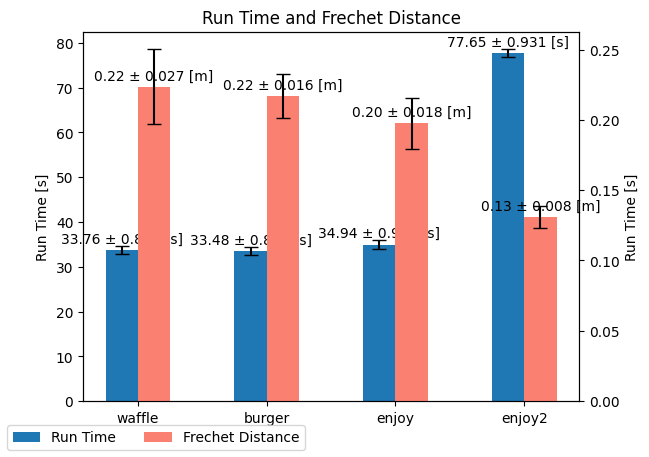

In [3]:
fig = plot_time_frechet(trial_datas_std)
plt.show()

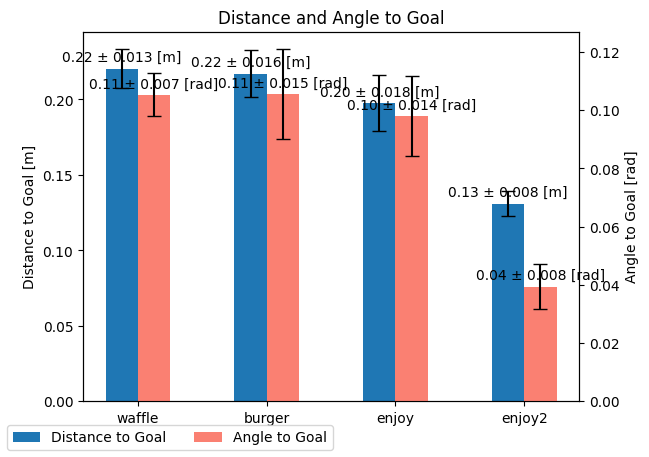

In [4]:
# plot distance_to_goal and angle_to_goal
fig = plot_distance_angle(trial_datas_std)
plt.show()

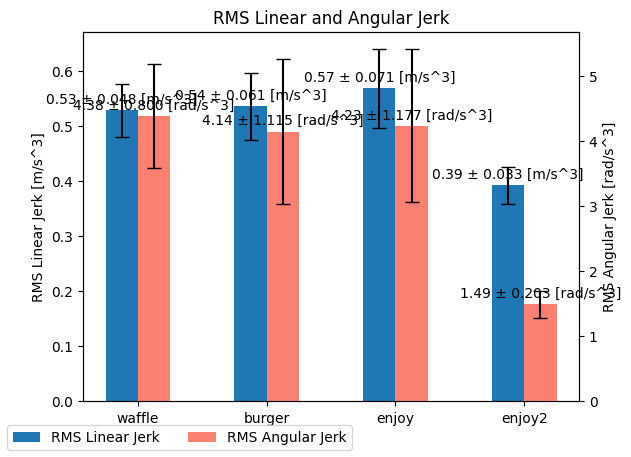

In [5]:
# plot rms_linear_jerk and rms_angular_jerk
plot_rms(trial_datas_std)
plt.show()

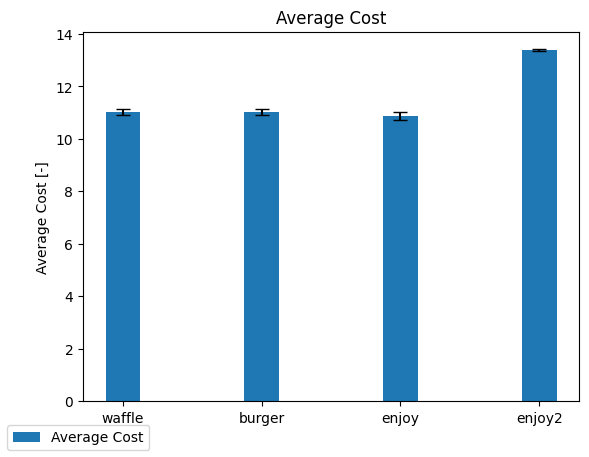

In [6]:
# plot avg_cost
fig = plot_avg_cost(trial_datas_std)
plt.show()

In [7]:
# next compare random distribution with the default distribution

# load
waffle_rand100_path = WORK_DIR + '/waffle_random_2024-12-28_12-42-49'
waffle_rand500_path = WORK_DIR + '/waffle_random_2024-12-28_15-49-04'

# load data
waffle_rand100_data = eval_trial_data(waffle_rand100_path)
waffle_rand500_data = eval_trial_data(waffle_rand500_path)

trial_datas_rand = {
    'waffle_default': waffle_std_data,
    'waffle_random_100': waffle_rand100_data,
    'waffle_random_500': waffle_rand500_data,
}

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_random_2024-12-28_12-42-49 ___
RUN NAME: waffle_random
Runs/successful: 100/81
Whole run time: 50.48 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_random_2024-12-28_15-49-04 ___
RUN NAME: waffle_random
Runs/successful: 500/399
Whole run time: 253.18 [mins]


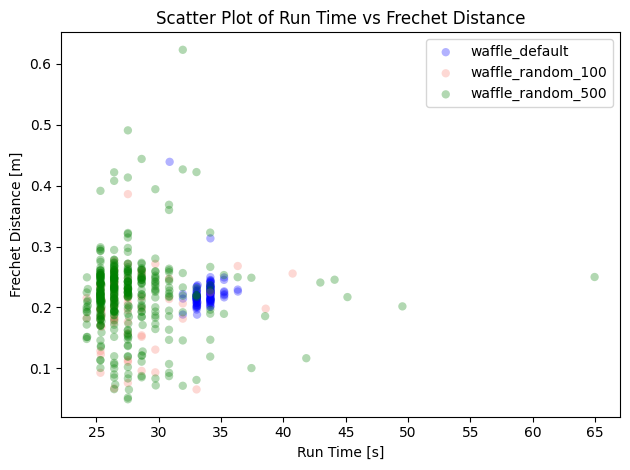

In [8]:
# create a scatter plot
fig = scatter_time_frechet(trial_datas_rand)
plt.tight_layout()
plt.show()

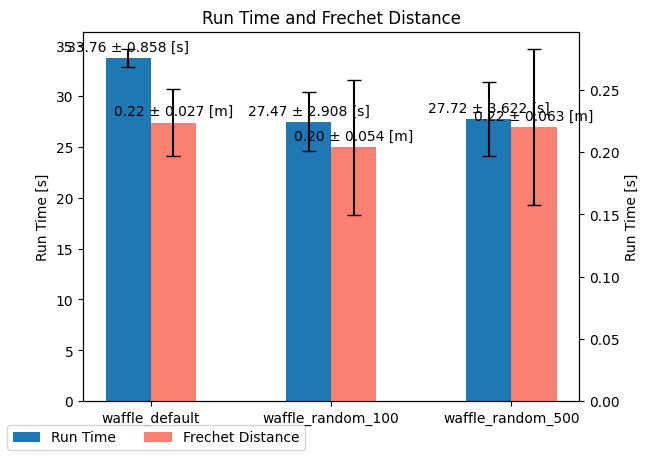

In [9]:
# plot run_time and frechet_distance
fig = plot_time_frechet(trial_datas_rand)

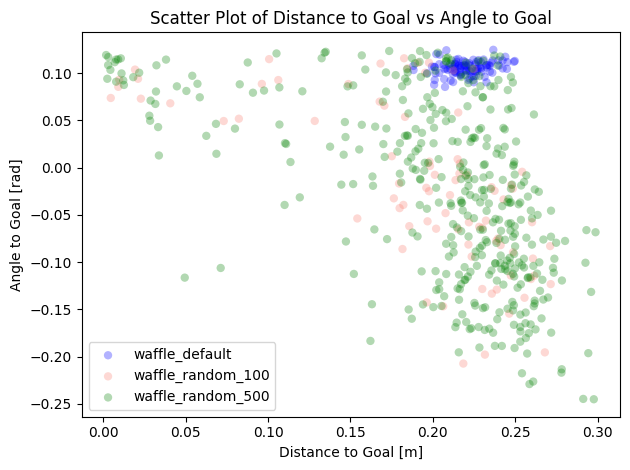

In [10]:
# create a scatter plot
fig = scatter_distance_angle(trial_datas_rand)
plt.tight_layout()
plt.show()

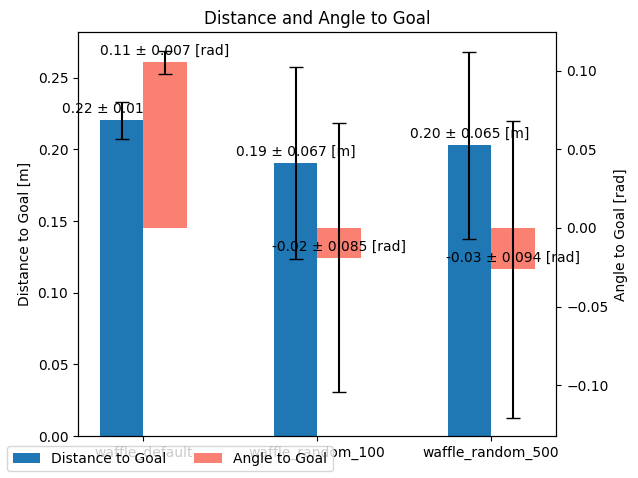

In [11]:
# plot distance_to_goal and angle_to_goal
fig = plot_distance_angle(trial_datas_rand)
plt.tight_layout()
plt.show()

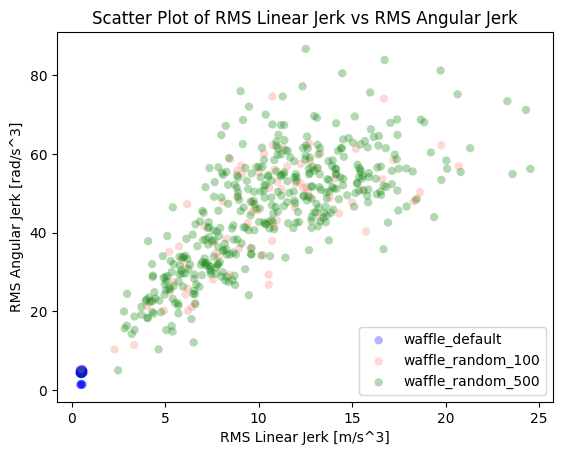

In [12]:
# create a scatter plot for rms
fig = scatter_rms(trial_datas_rand)
plt.show()

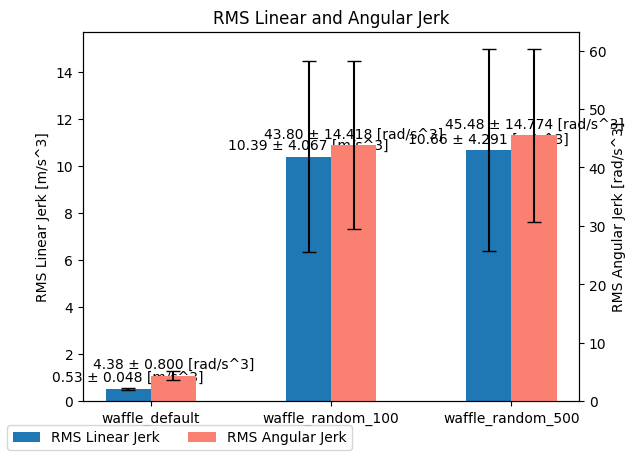

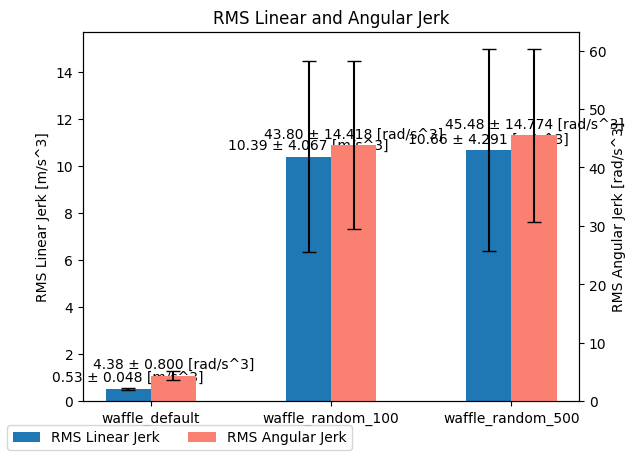

In [13]:
# plot rms_linear_jerk and rms_angular_jerk
plot_rms(trial_datas_rand)

/tmp/ipykernel_405416/2434121282.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critics_df.rename(columns=renamed_columns, inplace=True)


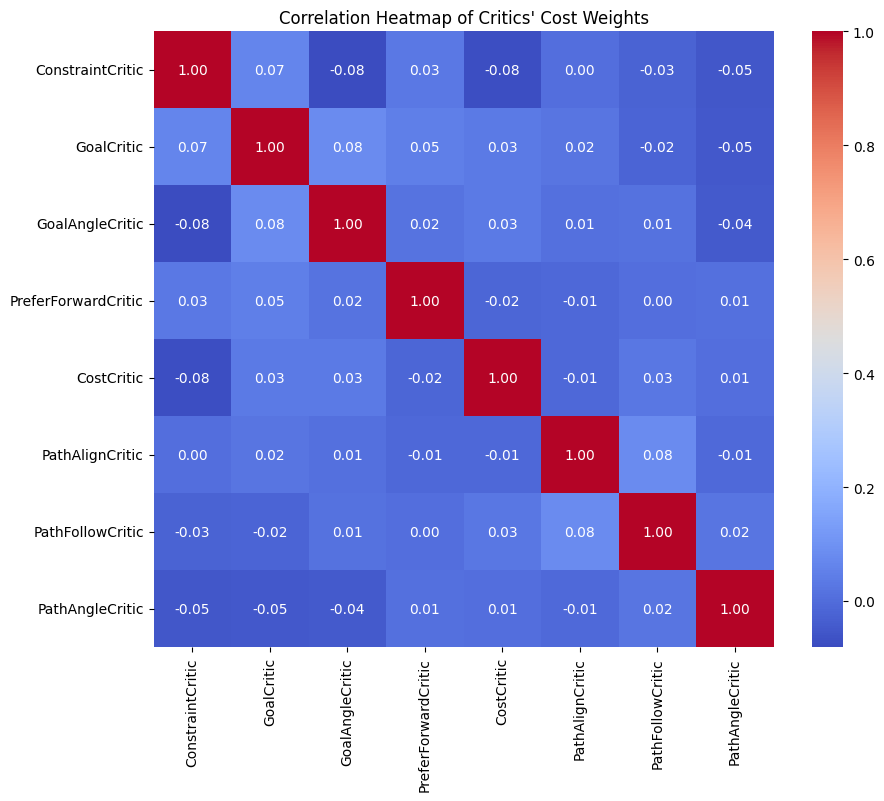

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "path_to_your_file.csv"  # Replace with your file path
file_path = '/home/turtlewizard/repos/thesis-mppi-model-ident/evaluation/02_random/waffle_random/final_results.csv'
data = pd.read_csv(file_path)

# Extract cost_weight columns
cost_weight_columns = [col for col in data.columns if "cost_weight" in col]
critics_df = data[cost_weight_columns]

# Rename columns to remove '.cost_weight'
renamed_columns = {col: col.replace(".cost_weight", "") for col in cost_weight_columns}
critics_df.rename(columns=renamed_columns, inplace=True)

# Calculate correlations
correlation_matrix = critics_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Add titles and labels
plt.title("Correlation Heatmap of Critics' Cost Weights")
plt.show()